# Calculate conservation index

### Importing Libraries


In [1]:
import pandas as pd # This is a library for data analysis 
pd.set_option('display.max_rows', 120)
import numpy as np
import matplotlib.pyplot as plt

## Useful functions

In [2]:
# Calculation of frequencies in a dataset or a specific column

# Background calculations
def Qdis(dataset):
    freq = np.zeros((4, 1))
    count=0
    for i in range(len(dataset)):
        if dataset[i]=="A":
            freq[0]+=1
            count+=1
            continue
        if dataset[i]=="T":
            freq[1]+=1
            count+=1
            continue
        if dataset[i]=="C":
            freq[2]+=1
            count+=1
            continue
        if dataset[i]=="G":
            freq[3]+=1
            count+=1
            continue
    freq=freq/count
    return freq

# Column calculations
def Pdis(dataset):
    dataset=dataset.split(",")
    freq=np.zeros((4,len(dataset[0])))
    xtra=0
    for i in range(len(dataset[0])):
        for j in range(len(dataset)):
            if dataset[j][i].upper()=="A":
                freq[0][i]+=1
                continue
            if dataset[j][i].upper()=="T":
                freq[1][i]+=1
                continue
            if dataset[j][i].upper()=="C":
                freq[2][i]+=1
                continue
            if dataset[j][i].upper()=="G":
                freq[3][i]+=1
                continue
    for i in range(len(dataset[0])):
        if freq[0][i]==0:
            freq[0][i]=1
            xtra+=1
        if freq[1][i]==0:
            freq[1][i]=1
            xtra+=1
        if freq[2][i]==0:
            freq[2][i]=1
            xtra+=1
        if freq[3][i]==0:
            freq[3][i]=1
            xtra+=1
    freq=freq/(len(dataset)+xtra)
    return freq

# Calculation relative entropy
def RE(Q,P):
    relativ = np.zeros((4,P.shape[1]))
    for i in range(P.shape[1]):
        for j in range(P.shape[0]):
            relativ[j][i] = relativ[j][i] + P[j][i]*np.log10(P[j][i]/(0.5*P[j][i]+0.5*Q[j]))
    relativ = np.sum(relativ,axis=0)
    return relativ

# Invert Q,P
def REin(Q,P):
    relativ = np.zeros((4,P.shape[1]))
    for i in range(P.shape[1]):
        for j in range(P.shape[0]):
            relativ[j][i] = relativ[j][i] + Q[j]*np.log10(Q[j]/(0.5*Q[j]+0.5*P[j][i]))
    relativ = np.sum(relativ,axis=0)
    return relativ

# Conservation calculation 2 - Jensen-Shannon Divergence
def conservJSD(dataset):
    Q = Qdis(dataset)
    P = Pdis(dataset)
    JSD = 0.5*RE(Q,P) + 0.5*REin(Q,P)
    return JSD

### Data

In [3]:
# CCCT equip IGKV9, IGKV3, IGKV6, macaca IGLV5,IGLV7,IGLV8,IGLV9,IGLV10 L=4
ccct="TGACTCTACCCTATGACGTT,TGACTCCACCCCCAAAGGCT,ATCATCAGCCCTGGGAGGGA,TGTGATGCCCCTGCCCCCCA,AAGGTCTCCCCACAGGACAG,TTTTTTATCCTCTTGGGCCT,ACACATACCCCTTATCCAGG,AACACACCCTCTCCACATAG,AACACACTCTCTCCAAGCAG,AACACACCCCCTTCCTGTCG,AACACACCCCCTCCAAGCAG,AACACACCCCCTCCCTGTCG,AATCACACATCTTCACCCAG,GGTGTAGCCCCTTCTCCTTG,GGTGTAGCCCCTTCTCCTTG,TCTGGGTCCCCTCCTTCCTA,GGTGAAAGTCTTTCTTCTTC,ACTGAATGTCTCCCTCCATG,GAGGCAGGCAATGTGGGGGG,AAAAATTACCAGGAGGATAC,GGGGCAGGCAGTGGGAGCAA,TGAGGTCACCAGGAAGACAA,TGGGCAGTCCCTGGGTGGAA,TGGGCAGTCCCTGGGTGGAA,TGGGCAGCCCCTGGGTGGAA,TGGGCAGTCCCTGGGTGGAA,TGGGCAGTCCCTGGGTGGAA,TGGGCAGTCCCTGGGTGGAA,GAGAGAGACGTTGCAAGGAA,GGGCAGAGGCAATGGGGGGA,TGGGCAGGCCTTGGAAGGAA,ttatttaaccctggggcaag,ttatttaaccctggggcaga,ttatttaaccctggggcaga,gagaagagccctggtcaggc,gagaagagccctcgtcaggc,gagaagagccctcgtcaggc,cctgccagccctgagagggc,cctgccggccctgagagggc,cctgccggccctgagagggc,CCCAGCCGCCCTGCAGTCCA,CCTAGCCATGCTGCTGTTCA,CCCAGCCACGCTGCTATCTA,CCCAGCCATGCTGCTGTCCA,CCCAGCCACGTTGCTGTCCA,TAAAGTGGTCCCACCTCTCA,TGAAGTGCTCCTGCTTCTCA,TGAAAAGGCCCTGCCTCTCG,ACAGGCCACTCTCTCCAGCA,ACAGGCTGCTCTCTTCAGCA,ATGGGCCGCTCTCTCCAGCA,AAGGGCCGTTCTCTCCAACA,ATGGGCCACTCTCTCCAGTA,ACAGGCCGCTCTCTCCAGTA,ATGGGTTGCTCTCTCCAGTA,ATGCTCTGTTCTCTTCAGCA,ACGGGCTGTTCTCTTCAGCA,TTTGTAACCTCGCTGTACTG,ATGGGCTGTTCTCTTCAGCA,ACAGGCTGCGCTCTCCAGCA,AGCAGCAGCCCTGACTCTGC,GCAGCAGCCCCTGACTCTGC,GCAGCAGCCCCTGACTCTGC,GCAGCAGCCGCTGACTCTGC,GCAGCAGCCCCTAACTCTGC,GCAGTAGCCCCCAACTCTGC,GCAGCAGCTCCTGACTCTGC,GCAGCAGCTCCTGACGCTGC,GTAATTGCACCTGCCCCACC,GCAGCAGCTCCTGACTCTGC,GCAGCAGCCGCTGACTCTGC"

# TATA equip IGKV2, macaca IGKV3 L=8
tata8 = "TTGGGAGATACAAAGGTACTCAGT,TTGGGAGCTATAAAGAGACTTAGG,CAGTGAAAGATAAGAAGGGCTGGT,CAGTGAAAGATAAGAAGGGCTGGT,TAGTGAAAGATAAGAAGGGCTGGT,GTGTGATGGATCAGAGGTGATGGT,GGGTGACAGATTAAGAAGCGTTGG,CCTCAGAGTATAAAGAGAGAAAAG,TGTGAGCCCAGTGACACTGCGATA,TCTGATGGTATGAGGAGAAGAAAG,TCTCTGAGTATGAAGAGAGGAAGG,TCTCAGAGTATGAAGAGAGGGAGA,TCTCAGAGTATGAAGAAGGAGGGG,TCTCAGAGTATGAAGAGCGGCAGG,TCTCAGAGCATGAAGAGGGGCAGG,TCTCAGAGTATAAAGAGGGGCAGG,TCTCAGAGTATGAAGAGAGGGAGA,TCTCAGAGTATGAAGAGGGGCAGG,TCTCAGAGTATGAAGACAGGGAGA,TCTCAGAGTATAAAGAGGGGCAGG,ATTGAGCATATTTTATGTCATTTT,ATTGAACATATTTTATGTCACTTT,ATTGAACATATTTTATGTCACTTT,CACAGAGACATTTTATCTTACTTG,CACAGAAGATATTTATGTGACTTT,CACAGAAGATATTTATATGACTTT,CACTGAAGATATTTATGTGACTTT,AGAGAACCTTTTATTACATTTATC,AGAGAACCTTTTATTACATTTATC,CACTGAAGATATTTATGTGACTTT,CAGAGCCCGTGTCAATGCCTGGGT,CAGAGCCCATATCAATGCCTGGGT,CAGAGCCCTTATCAATGCCTGGGT,CAGAGCCCATATCAATGCCTGGGT,CAGAGCCCATATCAATGCCTGGGT,CAGAACCCATATCAATGCCTGGGT,CAGAACCCATATCAATGCCTGGGT,CAGAGCCCATATGAATGCCTGGGT,CAGAGCCCATATCAATGCCTGGGT,CAGAGCTCATATCAATGTCTGGGT,TAGAGCCCATATCAATGCCTGGGT,CAGAGCCCATATCAATGCCTGGGT,CAGAGCCCACATCAGTGCCTGCGT"

# TATA macaca IGHV1,IGHV3,IGKV2,IGLV1,IGLV3, IGLV4,IGLV5,IGLV9,IGLV10,IGLV11 equipues IGKV2,IGKV3,IGKV6 L=6
tata6 ="ACACTGCGATAAGAGCGGCCTG,CACTGAGGAAATAAGAGGCTTT,GAGGGTGAACACGACAGACCTG,GAGGGTGGATAAGAGAGACCTG,AGAAGAGGATAAGATAGGAGCT,AGAAGAGGATAAGACAGGAGCT,GCAAGGGGACAAGAGAGGCCTG,GCAAGGGAATAAGAGAGGCCTG,GCAAGGGGATAAGAGAGGCCTG,ACAAGGGGTTAAGGGAGACCTG,GTAAGAGGATAAAAGAAGCCTG,GTAAGAAGATAAGAGAGGCCTG,GTAACGGGATAAGAGAGGTCTT,GCAAAGGTATAAGAGAGGCCTG,GCAAAGGTATAAGAGAGGCCTG,CTGGGCAGAGCAGAGCAGGGTG,GCAAAGGTATAAGAGAGGCCTG,CAGTGGGGGTAAGACAGGGCTG,CAGAGGGGATAAGACAGGGCTG,CAGAGGAGATAAGACAGGGCTG,CAGAGGAGATAACACAGGGCTG,CAGAGGGGATAAGACAGGGCTG,CAGAGGGGATAAGACAGGGCTG,CAGAGGGGATAACACAGGGCTG,CAGAGGGGATAAAACAGGGGCG,CAGAGGAGATAACACAGGGCTG,CAGAAGGGATAAGACAGGGCTA,CAGGGCGGATAAGAGAGGCAGT,CAGAAGAGATAACACAGGGCTG,CCAGGAGTATAAAGAGAGGGAG,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTGTGAGATAAAAGCTCAGCA,AGTCTGAGATAAAAGCTCAACT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAACTCAGCT,AGTCTTAGATGAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGAT,AGTCTGAGATAAAAGCTCAGAT,AGTCTGAGATAAAAGCTCAGCT,AGTCTAAGATAAATACTGAGTT,AGTCTGAGATAAAAGCTCAGCT,GTCTAGGAGAAAAGCTCAGCTG,AGTCTGAGACAAAAGCTCAGTA,AGTCTGAGATAAAAGCTCAACT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AATCTCAGATAAAAGCTCAGCT,GCAGTCAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,TCAGTCAGATAAAAGCTCAGCT,AGTCTTAGATAAAAGCTCAGGT,ATTCTGAGATAAACGCTCAGCT,AGTCAGAGATAAAGGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAGCTCAGCT,AGTGTGAGATAAAAGCTCAGCA,AGTCTGAGATAAAAGACTCTTG,AGTCTGAGATAAAAGCTCAGCT,AGTTTGAGATAAAAGCTCAGCC,AGTCTGAGATAAAAGCTCAGCT,AGTCTGAGATAAAAACTCAGCT,GGTCTGAGATAAAAGCTCAGCT,CACAGTCTTATAAGGAGCTCTT,AGAGCCCATATCAACGTGGGTC,AGAGCCCATATCAACGTGGGTC,TACCGAAGTAAATACAGATCTG,TACCGAGGTAAATACAGATCTC,TGCCGAGGTAAATACAGATCTG,TGCCGAGGTAAATACAGATCTG,CTCTGAGATACATATAAATCTA,TCCTGAGGTAAATATAGATATA,TCCTGAGATAAATATAGATATA,TACTGAGGTAAATATGGATACA,CACTGGGGTAAATATGGATATG,CACTGAGGTCAATATGGATATG,CATTGAGGTAAATATGGATATG,CACTGAGGTCAATATGGATATG,CACTGAACTAAATAACCTGACA,CACTGAAGTAAATAACCTGATA,CACTGAGATAAATATGGATATG,CACTGAGGTGAATATGGGTATG,CACTGAGGTAAATATGGATGTC,CACTGAGGTAAATATGTTCTGT,CACTGCAGTAAATATGTTCTGT,AGTCTGAGATAAAAGGTCAGCT,AGGCTGAGATAAAAGATCAACT,AGGCTGAGATAAAAGATCAACT,AGTCTGAGATAAAAGATCAGCT,AACTTGTAGTAAAGATCCTTGC,GCTTGAGTTATGAAATACCTGC,GCCTGAGCTATGAAATACCTGC,GCTTGAGCTATGAAATACCTGC,GCTTGAGCTATGAAATACCTGC,TTTGAGCTGTGAAATACCTTGC,TTTGAGCTGTGAAATATCCTGC,TTTGAGCTGTGAAATACCCTGC,TTTGAGCTGTGAAATACCCTGC,TTTGAGGTATGAAATAAACTGT,CTTGAGCTATGAAATGCTCTGT,CTTCAGCTATGAAATGCTCTGT,CTTGAGCCATGAAATGCTCTAA,TTTGAGCCATGAAATGCTCTGA,TGTGAGCTACGAAATGTTCTGC,TCTGAGCTACAAAATGTTCTGC,CTTGAGTTATGAATTGCTCTGT,TTTGAGCTATGAAATGCTCTCT,TTTGAGCTATGAAATGCTCTTT,TTTGAGCTATGAAATGCTCTGT,TTTGAGCTATGAAATGCTCTGT,GCTCATCTCATCTAGGGTCTTC,GCTCATCTCATCTAGGGTCTTC,GCTCATCTCATCTAGGGTCTTC,GAGCTCACTGTACAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTACATAGTAGGAGA,TAGATTTCTGTATATTAGGATA,GCGCTTTCTATATATTAGGAGA,GAGCTTGCTATAGAGGAGGAGA,GATCCTGCTATAGAGGAGGAGA,CCGCTTGCTATAGAGGAGGAGG,CACCTTGCTATAGAGGAGGAGG,GAGCTTGCTATGGCGGACGAGG,GATCTTGCAATGGAGGAGGAGA,GAGCTTGCTATAGAGGAGGAGG,GAGCTTACTATAGAGGAGGACG,GAACTTGCTATATAGTAGGAGA,GAGCTTGCCATATAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGCAAGAGA,GAGCTTGCTATATAGCAAGAGA,GAGCTTGCTATATAGCAAGAGA,GAGCTTGCTATATAGCAGGAGA,GAGCTTGCTATATAGCAGGAGA,GAGCTTGCTATATAGCAGGAGA,GAGCTTGCTATATAGCAGGAGA,GAGCTTGCTATATAGCAGGAGA,GAGCTTGCTATATAGTGGGGGA,GAGCCTGCTATATAGTGGGGGA,GAGCTTTCTATACAGTAGGAGA,GAGCTTGCTATACAGTAGGAGA,GAGCTTTCTATACAGTAGGAGA,CAGCTTGCTATATAGTAGGAGA,GAACTCGGTATATAGTAGGAGA,GAACTCACTATATAGTAGGAGA,GAACTCATTATATAGTAGGAGA,GAACTCATTATATAGTAGGAGA,GAACTCATTATATAGTAGGAGA,GAGTTTTTTATGTAGTTGGAAA,AGACTTTTTATTTAGTAGGAGG,GAGCTTGCTATACAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTAAATAGTAGGAGA,GAGCTTGCTATATAATAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GAGCTCTCTGTGTAGTAGGAGA,GAGCTTGTTATGTATTAGGAGA,GAGTTCGTTATATATTAGGAGA,GAGCTTGCTATATAGTAGGAGA,GGGCTTGTTATATAGTAGGAGA,AAGCTTGCTATATAGTAGGAGA,GAGCTTGCTATATAGTAGTAGT,GAGCTTGCTATATAGCAGGACA,GAGCTTGCTATATAGCAGGACA,GAACTTGCCATATAGTAGGAGA,GTGCTTGCTATATAGTAGGAGA,GTGCTTGCCATATAGTAGGAGA,GTGCTTGCCATATAGTAGGAGA,GTGCTTGCCATATAGTAGGAGA,GAGCTTACTATATAGTAGGAGA,GAGCTTACTATATAGTAGGAGA,GAGCTTCCTATATAGTAGGAGA,GAGCTTCCTATATAGTAGGAGA,GAGCTTCCTATATAGTAGGACA"

# TATA macaca IGHV2,IGHV3,IGHV4,IGKV5,IGLV7 IGLV1,IGLV5,IGLV8 equip IGKV2 L=7
tata7 = "GGAGAGGCATGAAAAGGCCCTGA,AGGAGAGAATGCAAGAACCAGCA,AGTAGGACATAAAGAGCTATCAG,AATAGGAGATAAAGAGCCATCAG,AATAGGAGATAAAGAGCCATCAG,AATAGGAGATAAAGAGCCATCAG,AATAGGAGATAAAGAGCCATCAG,ATGAAGAGTTAGAGGAACAGTCC,AGGGTGGGAAGAAAAGGAGGCCC,AGGGTGGGAAGAAAAGGAGGCCT,AGGGTGGGAAGAAAAGGAGGCCT,ATGGTGGGAAGAAAAGGAGGCCT,AGGGTGGGAAGAAAAGGAGGCCT,AGGGTGGGAAGAAAAGGAGGCCT,GTGGAGGGAATAAGAGGCCTGAG,CTGGAGGAGATAAAAGAGGACTG,CTGAAGGGGATAAGAGAGGCCTG,GTCAGAGAATGAAGAGGGGAAGG,CTCTGCAGTTATCATATATGCCG,TTGTGGCCATAAAATCTATGCTG,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACAGTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACTTTTTCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACAGTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGCTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGAGTCC,ACATTTCCTTAAATTCAGGGTCC,ACATTTCCTTAAATTCAGGGTCC,CATCCCATCCCAGAGCTTGCTAT,CATCCCATCCCAGAGCTTGCTAT,TCAGGCATCCCATCCCAGAGCTT,CTTAGCTGATGAAAACCAGCCCA,CTTAACTGATGAAAACCAGCCTA,CTCAGCTGATGAAAACCAACCCA,CTCAGCTGATGAAAACCAGCCCA,CTCAGCTGATGAAAACCAGCCCA,CTGTCCTGATGAAAACCAACCTT,CTCTTCTGATGAAAACCGGCCCA,CTCTCCTGGTGAAAACAAGCCCA,CTCTCCTGGTGAAAACAAGCCCA,CTCTTCTGGTGAGAACAAGCCCA,CTCTCCCGGTGAAAACAAGCCCA,CCTCCTGGTGAAAACAAGCCCAG,CTCTGCTGATACGAAACAGCCCA,TGGTGCTGATGAAAAGCAGCCCA,TTTGGGTGATGAAAAGCAGCCCA,TTTAGGTGATGAAAAACAGCCCA,CTCTTCTGATGAAAAGCAGCCCA,CTCTTCTGGTGAAAAGCAGCCCA,CTCTTCTGGTGAAAAGCAGCCCA,CTCTGCTGATAAAATCCAGCCCA,CTCTACTGATAAAAACCAGGCCA,CTCTGCCGATAAAAACCAGGCCA,CTCTACTGATAAAAACCAGGCCA,CTCTACTGATAAAAACCAGGCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAGCCCAGTCC,CTCTGCTCATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGACGAAAACCGTCCAG,CTCTGCTGATGAAAACCAGCCCA,CCATTGCTGATGAAAAGCAGCCC,CTCTGCTTATATGAAAACTAACC,CTCTGCTTATATGAAAACTAACC,CTGCTTATATGAAAACTAACCTA,CTCCTCTGGTGAAAACCAGCCCT,CTTCTCTGGTGAAAACCAGCCCA,CTCTGCTGATGAAAAGCAGCCCA,CTCTGCTTATGATAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTCCTGATGAAAACCAGCCCA,CTCTCCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAAGCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGTTGAAAACCAGTCAA,CTCTACTAATGAAAACCAACTGA,TTCTACTGATGAAAACCAACCCA,TTCTACTGATAAAAACCAACCCA,TTCTACTGATGAAAACCAACCCA,CTCTACTGATGAAAACCGACCCA,CCCTGCTGATGAAAACCAGCCAA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTCCTGATGAAAACCAGCCTA,CTCTCCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTCCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CTCTGCTGATGAAAACCAGCCCA,CCTCTGGGCTGAAAAGCAGAGCA,CCTGTGGGTTGAAAAGCTGAGCA,CCTCTGGGTTGAAAAGCCGAGCA,CCTCACGGTTGAAAAGCCGAGCA,CCTCTGGGTTGAAAAGCCGAGCA,ACAGAAGATTTTTATGTCACTTT,ATAGAGACATTTTATGTCACTTT,ATAGAGACATTTTATGTCACTTT"

#8MER macaca IGHV3,IGHV4 L=8 
octa = "GGTCTTCTCTGGGACCTGTCCTCT,GGTCTTCTCTGGGACCTGTCCTCT,GGTCTTCTCTGGGACCTGTCCTCT,TAGGAGACATGAAAATAGGACCCT,TAGGAGACAGGAAAATATGACCCT,TAGGAGACATGAAAGCAGGGCCCT,TAGGATACATGAAACTAGGGCCCT,TAGGAGACATGAAAATAGGGCCCT,GAGGAGACACACAAATAGGGCCCT,GAGGAGACCAGCAAAGAGGGCCTT,GAGGAGGCATGAAAACAGGGCCCT,GAGGAGGCATGAAAACAGGGCCCT,GACGAGGCATGAAAACAGGGCCAA,GAGGAGATGTGAAAACCATGCCCT,GAGGAGGCATGAAAACAGGGCCCT,GAGGACGCATGAAAACAGGACTCT,TAGGAGACATTCAAATAGGTTCCT,TAGGAGACATGCAAATAATATCCC,TAGGAGACATGCAAATAAGACTCC,TAGGAGACATGCAAATAAGACCCC,CAAGAGACATGCAAATAGGTCCCT,CAAGAGACATGCAAATAGGTCCCT,CAAGAGACATGCAAATAGGTCCCT,CAGGAGACATGCAAATAGGGTCCT,CAGGAGACATGCAAATAGGGCCCT,CAGGAGACATGCCAATAGGGCCCT,CAGGAGATATGCAAATAGGGCCCT,CAGGAGACATGCAAATAGGGCCCT,TGGGGGACATGCAAATAGGGCCCT,TGGGGGACATGCAAATAGGGCCCT,TGGGGGACATGCAAATAGGGCCCT,TAGGAGACATGCAAATAGGTTTCT,TAGGAGACATGCAAATAGGTTTCT,TAGGAGACATGCAAATAGGTTTCT,TAGGAGACATGCAAATAAGGCACT,TAGGAGATATGCAAATAGGTCCCT,TAGGAGACATGCAAATGGGGTCCC,TAGGAGACATGCAAATAGGGTCCT,TAGGAGACATGCAAATGGGGTCCT,TAGGAGACATGCAAATAGGGTCCT,TAGGAGACATGCAAATAGGTCCCT,TAGGAGACATGCAAATAGAGCCCT,TAGGAGACATGCAAATAGAGCCCT,TAGGAGACATGCAAATAGAGCCCT,TAGGAGACATGCAAATAGGTCCCT,TAGGAGATATGCAAATAGGTCCCT,TAGGAGACATGCAAATAGGGCCCT,TAGGAGATATGCAAATAGGTCCCT,TAGGAGATATGCAAATAGGGCCCT,TAGGAGACATGCAAATAGGGTCCT,TAGGAGACATGCAAATAGGGTCCT,TAGGAGACATGCAAATAGGGCCCT,TAGGAGACATGCAAATAGGGCCCT,TAGGAGACATGCAAATAGGGTCCT,TAGTAGTTATGCAAATAGGGCCCT,CAGGACACATGCAAATACCGTCCT,CAGGACACATGCAAATACCGTCCT,TAGGAGACATGCAAATACCGTCCT,TAGGAGACATGCAAATACCGTCCT,TAGGAGACATGCAAATAGGGCCCT,TAGGAGATATGCAAATATCGTCCT,TAGGAGACATGCAAATACCGTCCT,TAGGAGACATGCAAATAGGGCCCT,TAGGAGACATGCAAATAGGGTCCT,TAGGAGACATGCAAATACCGTCCT,TAGGAGACATGCAAATGGGGTCCT,TAGGACACATGCAAATAGGGTCCT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCCTCATTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATCCTTACTT,CCACCCACATGCAAATCCTCACTT,CCACCCATATGCAAATCCTCACTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATACTCACTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCCTCATTT,CCACCCACATGCAAATCTTCACTT,CCACCCACATGCAAATCCTCACTT,CCACCCACATGCAAATCCTCACTT"

# EBOX macaca IGHV4,IGKV6,IGLV8,IGLV9 L=6
ebox = "CTCAGGCTCAGCTGAGAGACTG,ACAAACTCCAGCTGAGAAGCCT,GTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGC,GTCCTGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,GTCCTGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGT,GTCCTGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,GTCCAGCTCACATGGGAAATGC,CTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGT,GTCCAGCTCACATGGGAAATGT,GTCCAGCTTACATGGGAAATGC,ACTGACTACAGCTGAAAGTTGG,GGATAGAGCAAAAGAGACAAGT,AATCTGCCCAGCCTGGGCCTCG,AACCTGCCCAGCCTGGGCCTCA,AACCTGCCCATCCTGGCTTCAG,AGCCTGCCCAGCCTCAGATTTG,CACCTGCCCTGTCTGGGTCTCA,AACCTGCCCAGCCTGGGCCTCA,AACCTGCCCAGCCTGGGCCTCA,AACCTGCCCAGCCTGACTTTGG,AACCTGCCCAGCCTGGCCTCGG,AACCTGCCCAGCCTGGCCTCGG,AACCTGCCCAGCCTGGGCCTCA"

# DECA equip IGKV2,IGKV9, macaca IGKV7,IGLV3,IGLV5,IGLV7,IGLV8,IGLV9,IGLV10 L=10
deca = "GCAAGGTCTTAAGTGAACACAGTGAC,GCAAGATCTTATTTAAATGCTGTGAC,GAGGGAAACGATTTGCATGGAATGTG,AAGGTAACAGATTTATACTACACACA,GGTAGTAAAGATTTGCATAAAGTGCC,GGCAGTGAAGATTTGCATACAGCAGC,GGCAGTAAAGATTTGCATACAGCAGC,GGCAATAAAGATTTGCATACAGCAGC,GGCAGTAAAGATTTGCATAAAGTAGC,AAGAATCCATATTTGCGTAATGCCTC,GACTCTGCTGATTTGCATCACAGGCT,GACTCTGCTGATTTGCATAATGGGCC,GACTCTGCTGATTGGCAGCAAGGGCC,GACTCTGCTGATTTGCATCATGGGCC,AACTCTGCTGATTTGCATCACAGGCC,AACTCTGCTGATTTAAACCATGGGTT,GACTCTGCTGATTTGCATTATGCTCT,GACGCTGCTGATTTGCATCACGGGCT,GCCCCACCTCCCTGAAACACCACATT,GACTCTGCTGATTTGCATCATGGGCT,GACTCTGCTGATTTGCATCACAGGCT,TGGGGGGCACATTTGCATCCATAACT,GGATACACAAATTTTTGTGGACAGAT,GGAGCAACATATTTGCATCCATAACC,AGACAAACAAATGTGTGGGAACAGCC,GTGGAAACACATTTGCATGAGCAGCC,GTGGAAACACATTTGCATGAGCAGCC,GTGGAAACACATTTGCATGAGCAGCC,GTGGAAACACATTTGCATGAGCAGCC,GTGGAAACACATTTGCATGAGCAGCC,GTGGAAACACATTTGCATGAGCAGCC,AAGGAAACACATTTGCATAAGCATCC,GGGGGGACTCATTTGCATGGGCAGCC,CCACCAGAGGATTTGCATATTGTTCC,CCACCAGGGGATTTGCATATTGTTCC,CCACCAGGGGATTTGCATATTGTTCC,CCATTGGCGGATTTGCATATTGTTCC,CAACCAGGGCATTTGCATATTGTTCC,CCATCGGGGGATTTGCATATTGTTCC,CCATCAGAGGATTTGCATAATGTTCC,CCATCAGGGGATTTGCATATTGTTCC,CCATCAGGGGATTTGCATATTGTTCC,CCACCAGGGCATTTGCATATTGTCCC,CCACCAAGGAATTTGCATATTTTCCC,CCACCAAGGAATTTGCATATTTTCCC,CCACAAGGGGATTTGCATATTGTTCC,CCACAAGGGGATTTGCATATTGTTCC,aggccaccagacatgcaagttgactc,aggccatcagacatgcaaatcgactc,aggccatcagacatgcaaatcgactc,GTACCATATAATTCGCATATTTTTTC,GTACCACATAATTTGCATATTTCTCC,TTCTGAGCTGATTTGCATGTTGGGTC,CAGGACATAGATTTGCATGGAGGCCC,CAGGGTGTAGATTTGCATGGAGGCCC,CAGGGTGTAGATTTGCATGGAGGCCC,CAGGGTGCAGATTTGCATGGAGGCCC,CAGGGGGCAGATTTGCATGGAGGCCC,CAGGACGCAGATTTGCATGGAGGCCC,CAGGGTGTAGATTTGCATGGAGGCCC,CAGGGTGTAGATTTGCATGGAGCCCC,CAGGACGCAGATTTGCATGGAGGCCC,CAGGACACAGATTTGCATGGAGGCCC,TGGGACGAAGATTTGCACGGAGGCCC,CAGGATGCAGATTTGCATGGAAGCCC"

# Pentadec equip IGKV2,IGK3,IGKV4,IGKV5,IGKV6, macaca IGKV1,IGKV2,IGKV3,IGKV5,IGLV1,IGKV2,IGLV4,IGLV5,IGLV8,IGLV9,IGLV11 L=15
pentadec = "TGTGATGCAGCACCTGGCCACTAGGGGGAGG,CAGGCTCTTGGCTGTCTCCACACTGCTGCAC,CCTCCTGTTGGCTCTTTCCACACTGCTGCAC,CCTCCTGTTGGCTCTTTCCACACTGCTGCAC,CCTCCCCCTGGATCTCTCCACACTGCTGCAC,TCCTACATTGGTTCTTGCCACACAATATCTC,CCTCCAGATGGCCTTCTCCACACTGCTGCAC,CCTGTCATTGGCTCTCACCATACTGCTTTAC,CTCCCAGATGGCTGTCTCCACACTGCTGCAC,CTCCCAGATGGCTGTCTCCACACTGCTGCAC,TCCCACATTGGTTCTCTCCACACTGCTGCAC,TCCCACACTGGCTCTCTCCACACTGCTGCAC,TCCCACACTGGCTCTCTCCACACTGCTGCAC,CCTCCCCTTGGCTCTCTCCACACTGCTGCAC,CCTCCCCTTGGCTCTCTCCACACTGCTGCAC,ATTGTCTCTACAGCTGGAAGCCCTGCTTGCT,ATGGTCTCTGCAGCTGGAAGCCCAGATCACC,CAACTCACTGAACAGGAACTGTTGCTTTCAT,CAACTCACTGAACAGGAACTGTTGCTTTCAT,CAACTCACTGAACAGGAGCTGTTGCTCTCAT,CAACTCACTGAACAGGAACTGTTGCTCTCAT,GAACCCACTGCTCAAGCAATTTGCTACTATA,CAACCCACTGCACGTGTAATTTGCTTCGGTC,CAACCCACTGAGCATGCACTTTGCTTCTATC,CAACCCACTGAACATGCAATTTGCTTCTATC,CAACCCACCACACGTGCAATTTGCTTCTATC,CAACCCACCACACGTGCAATTTGCTTCTATC,CAACCCACTGCACATGCAACTTACTTCCATC,CAACTCACTGCACGTGCAATTTGCTTCTATC,CAGCCCACTGCTCATGCAATTTACTTCTATC,CAGCCCACTGCACATGCCATTTGCTTCTAAA,CCACTCACTGCACATGCAAGTTGCTTCTGTA,CAGCCCACTGCACATGCAAGTTGCTTCTGTA,ACAGTGCATGCAAGAAGTTTCACTCTGTGCC,CAGTTTCTTGACAAACATATCTGAGTTGTTA,cctccagctgcagatagggtgagcctgccag,cctctagctgcaggtggagtgagcctgccgg,cctctagctgcaggtggagtgagcctgccgg,GCCAGCCCTGCAGCTGTGCCCAGTCTACCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGACCC,GCCAACCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAGTCCTGCAGCTGTGCCCAGCCCGCCCC,AGCCAACCTGCAGCTGTGCCCAGCCTGCCCC,GCCAACCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAACCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAGCCCTGCAGCTGTGCCCCGTCTGCCCC,GCCAGCCCTGCACCTGTGCCCAGCCTGCCCC,GCCAGTTCTGCAGTTGTACCCAGCCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGTCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCCCT,GCCAGCCCTGCAGCTGTGCCCCGTCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCTCT,GACAGCCCTGCAGCTGTGCCCAGCCTGCCCT,CCAACCCCTGCAGCTGTGCCCAACCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCCCA,GCCAACCCTTCAGCAGTGCCCAGCCTGCCCA,ACCAGTCCTGCAGCTGTGCCCAGCTTGCTCC,GCCAGCCCTGCAGCAGTGCCCAGCCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCAGCCCC,TCCAGCCCTGCAGCTGTGCCCAGTCTGCCCC,GCCAGCCCTGCAGCTGTGCCCAGCCTGCCCC,GCCAGCCCTGTAGCTGTGCCCAGTGGGCCCC,GCCAGGCCTGCAGCTGTGCCCAGCCAGCCCC,ACCAGCCCTGCAGCTGTGCTCAGCCTGCCCC,AGTGGCCTGATCTCCGCTCACTGCAAGCTCC,GTCAGCCCTGCAGCCGTGCCCAGCCTGTCCC,CATCCCCTTGGCTCTTTCCACCCCACTGCAC,CTTCTCCTTGGCTGTTTCCACCCCACTGCAC,CTTCTCCTTGGTTCTTTCCACCTCACTGCAC,CTTCTCCTTGGCTGTTTCCACCTCACTGCAC,CTTCTCCTTGGCTGTTTCCACCCCACTGCAC,CATACTCTTGGCTCTTTCCACACCAGTGCAC,CCTCCCCTTGGCTCTTTTCGCACTGCTGAAC,TTTTCCCTTGACTTTTTCCATCCCACTGCAC,TTAAGCATTGTCTCTTTCCACACCACTGCAG,TACATACCATGTTATTTCTACACCACTGCAC,CCTCCCCTTGGCTCTTTCCACCCCACTGCAC,ACTCCCCTTGGCTCTTTCCACCCCACTGCAC,CCTCCCGTTGGCTCTTTCCACCCCACTGCAC,ACTCCCCTTGGCTCTTTCCACACTGCTGCAC,ACCCCTTCTGGCTCTTTCCAAATCACTACAC,ACCCCCCTTGGCTCTTTCCACCCCACTGCAC,CATCCCTTTGGCTCTTTCCACCCCACTACAC,CCTTCCCTTGGCTCCTTCCACTTTACTGCAC,CCTTCCCTTGGCTCTTTCCACCTCACTGCAC,CTGCACCCACCGTGGGCTGTCTGCTATCTGC,TCCCCCACTGGCTATTTCCACACCCCTGCAC,TGCCCCATCAACCTTTTCCACATCACTGCAT,TGCCCCATCAACGTTTTCCACACCACTGCAC,TACACCACTGACCCTTTTCACACTGCTGCAC,TCCACCACTGACCCTTTCCACACTGCTGCAC,TCCCTGACTGGCTGTTTCCACACCCCTGCAC,TACACCACTGACCCTTTTCACACTGCTGCAC,TACACCATAGACCCTTTCCACACTGCTGCCC,TGCCCCATCAACCTTTTCCACACCACTGCAC,CCAACCACTGGCTCTTCCCACCTCACTACAC,CCACCCAGTGGCTCTTTCCACACCACTGCAC,CCAATCACTGGCTCTTTCCACCTCACTACAC,TGCCACATTGACTCTTTCCACACCACTGCAT,CCGCCCAGTGACTCTTTCCACACCACTGCAC,CCTCCCTTTGGCTCTTTCCACACTGCTGCAC,TGCCCCATCAACCTTTTTCACATCACTGCAC,TCCACCATTGACCCTTTCCACACTGCTGCAC,CCCACCATTGGCTCTTTCCACACCACTGGAC,GTGGTCTCTGCAGCTGGAAGCCCAGCACTTG,GTGGTCCCTGCAGCTGGAAGCCCAGCTCCCA,GTGGTCCCTGCAGCTGGAAGCCCAGCTCCCA,ATGGTCCCTGCAGCTGGAAGCCCAGCTCCCA,GTGGTCTCTGCGGCCAGAAGTGCAGCTCCCA,GTAGTCCCTGCAGCTGGAAGCCCAGCTCCCA,GTGGTCCCTGCAGCTGGAAGCCCAGCTCCCA,GTGGTCCCTGCAGCTGGAAGCCCAGCTCCCA,ATGGTCTCAGCAGCCAGAAGCCCAGCATCCG,GTGGTCTCTGCAGAAGCACAGCACTTTCCAG,GTGGTCTCTGCAGCTGGAAGTCCGGCACCTT,GTGGTCTCTGCAGCTGGAAGCTCATCATCTT,GTGGTCTCTGCAGAAGCACAGCACTTCCCAT,GATATTTTTGGCTCTTGATTTACATTGGATA,GATATTTTTGGGTCTTGATTTATGTCGGATA,TCTGAGTGTGCACAGTTGTGAAGGTAAAACC,TCTGAGTGTGCACAGCTGTGAAGCTAAAACT,GAAATAAGAGCAGGTGTCCCCTTTGAGCACC,GAGGGGCCTGATCCAAGGCTGGCGTGGCATC,GAAGAGTCTCATCCAGGGCTTAGGGTGGATC,GAGGGCCCTGACCCTGACCCAAACACAGAGT,GATCTGTGAGTAACCAGGGCGTGGAGGCCCA,CAAGGGCCTGGTCCCTGTGAGTGCACCTGGG,GAGGGGCCTGATCCAAGGTCTAGTGTGGCAT,GAGGAGCCTGGCCCAGGGCTCAGGGCGGGGT,CAGAGGCCTGACCCAGGGCCCAGGGTGGGAT,TAGGGGCCTGACCCAGGACCCAGGGTGGGAT,TAGGGGCCTGACCCAGGGCCCAGGGTGGGAT,GAGAAGCTTGACCCAGGGCCCAGGGTGGGAT,AAGGAACCTGACCCAGGGCTCAGGGTGGGGT,CAGGGGCCTGACCCAGGGCCCAGGGTGGGAT,CAGGAGCCTGGCCCAGGGCTCAGGGTGGGGT,GAGAAGCTTGACCCAGGGCCCAGGGTGGGAT,CAATCCCCCCAGATGAGCCCTGCCGTCCAGG,TAGTCTCCTTGGCTGAGCCCCGCTGTCCAGG,TAATCTCCTCAGCTGAGCCCCACTGTCCCAG,TCATCTCCTCAGCTGAGCCCCGGTGTCCAGG,TGATCTCCTCAGCTGAGCTCCACTGTCCAGG,TAGTCTCCTCAGCTGAGCCCTGCTGTCCAGG,TAGTCTCCTCAGCTGAGCCCCACTGTCCAGG,TAATCTCCTCAGCTGAGCCCCACTGTCCAGG,TAATCTCCTCAGCTGAACCCCACTGTCCAGG,CAATCCCCTCGGCTAAGCCCTGCTGTCCAGG,ACTGGGACTGCACACGGGCCCAGGGAGGGGC,ACAGAGGCTGCAGGTAGGCTTAGGGAGACGT,CTGCAGTGTGAGCTGAGCTCCAGCCCCAGGG,CTGCAGAGTGAGCTGAGCTGCATCCCCAGGG,CATCCAGTTGTGCCCAGCCTCAGACTCTGAA,CTGCAGAGTGAGCTGAGCTGCATCCCCAGGG,CTGCAGAGTGAGCTGAGCTGCATCCCCAGGG,CTGCAGAGTGAGCTGAGCTGCATCCCCAGGG,CCTTTCCGAGAAGCGAGCTCATACTGCAGTT,AGGTACCAACAGCTGCCAGATACTGATAAAT,ATGTCTAAAGAATCATGCTTAGACTTCAGCT,CCCGGACCTGCAGGTGTTCTGTGCCCTCCAC,CCGGGACCTGCAGGTGTTCTGTGCCCTCCAC,TTTCCCCCTGCATCTGGCAGGTGTTTCTGTG,CATGAAGGTGTTTCTGTGCCCTCTCTGGGGT,CTTTCCCCTGCCCCTGTAGGTGATTCTGTGC,GAGGTCTCAGCAGCTGCCTCTCTCAAGGTCT,CCTGTGAGTGCACCTGGGGGCAGGCAATGGG"

## Main

In [4]:
Q = Qdis(ccct)
print(Q)
print(np.sum(Q))

[[0.19919355]
 [0.21048387]
 [0.34112903]
 [0.24919355]]
1.0


In [5]:
P=Pdis(ccct)
print(P)
print(np.sum(P,axis=0))

[[0.32394366 0.21126761 0.35211268 0.29577465 0.15492958 0.42253521
  0.21126761 0.1971831  0.02816901 0.02816901 0.05633803 0.02816901
  0.05633803 0.25352113 0.12676056 0.16901408 0.26760563 0.09859155
  0.23943662 0.47887324]
 [0.28169014 0.16901408 0.18309859 0.05633803 0.1971831  0.16901408
  0.15492958 0.09859155 0.18309859 0.1971831  0.08450704 0.85915493
  0.11267606 0.21126761 0.25352113 0.32394366 0.07042254 0.29577465
  0.15492958 0.04225352]
 [0.11267606 0.35211268 0.15492958 0.08450704 0.35211268 0.33802817
  0.23943662 0.33802817 0.77464789 0.66197183 0.84507042 0.07042254
  0.30985915 0.30985915 0.32394366 0.30985915 0.36619718 0.1971831
  0.29577465 0.26760563]
 [0.28169014 0.26760563 0.30985915 0.56338028 0.29577465 0.07042254
  0.3943662  0.36619718 0.01408451 0.11267606 0.01408451 0.04225352
  0.52112676 0.22535211 0.29577465 0.1971831  0.29577465 0.4084507
  0.30985915 0.21126761]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
result_ccct = conservJSD(ccct)
print("results ccct is"+'\n',result_ccct)
result_tata8 = conservJSD(tata8)
print("results tata8 is"+'\n',result_tata8)
result_tata6 = conservJSD(tata6)
print("results tata6 is"+'\n',result_tata6)
result_tata7 = conservJSD(tata7)
print("results tata7 is"+'\n',result_tata7)
result_octa = conservJSD(octa)
print("results octa is"+'\n',result_octa)
result_deca = conservJSD(deca)
print("results deca is"+'\n',result_deca)
result_ebox = conservJSD(ebox)
print("results ebox is"+'\n',result_ebox)
result_penta = conservJSD(pentadec)
print("results pentadec is"+'\n',result_penta)

results ccct is
 [0.01767605 0.0006217  0.01336686 0.04389558 0.00110113 0.02091142
 0.00648945 0.00693226 0.06240841 0.03284631 0.06692091 0.10025786
 0.02326988 0.00100296 0.00267733 0.00372677 0.00955442 0.01379089
 0.00238914 0.02748053]
results tata8 is
 [0.04477833 0.02117882 0.02998574 0.00645145 0.04643826 0.02804502
 0.04116806 0.03648692 0.01524796 0.04990884 0.04392586 0.03041269
 0.02739051 0.03305633 0.03821655 0.04218462 0.06637034 0.00672533
 0.05830739 0.00669353 0.02397924 0.01648429 0.05309389 0.03336754]
results tata6 is
 [0.0105773  0.00709334 0.01174247 0.04657195 0.0329941  0.01337201
 0.02186104 0.03844486 0.0393775  0.04381191 0.03275958 0.0866289
 0.01402987 0.10152327 0.03719965 0.00709149 0.00210748 0.02746747
 0.01340061 0.00410905 0.03934884 0.00233753]
results tata7 is
 [0.03757017 0.04944643 0.01073848 0.04355865 0.02477722 0.04204873
 0.02639171 0.06228037 0.03778748 0.10629603 0.05696594 0.09302515
 0.08856171 0.05917477 0.05808923 0.06042028 0.02473223

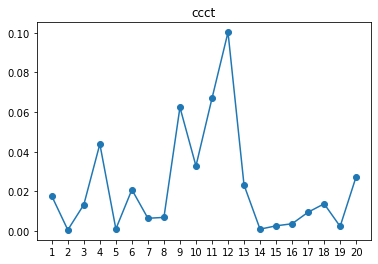

In [7]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_ccct)])
plt.plot(x[0:len(result_ccct)],result_ccct,marker='o')
plt.title("ccct")
plt.show()

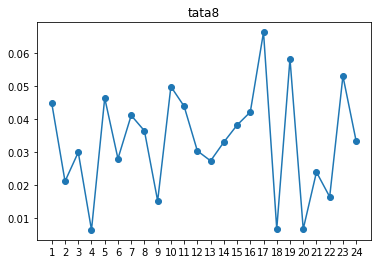

In [8]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_tata8)])
plt.plot(x[0:len(result_tata8)],result_tata8,marker='o')
plt.title("tata8")
plt.show()

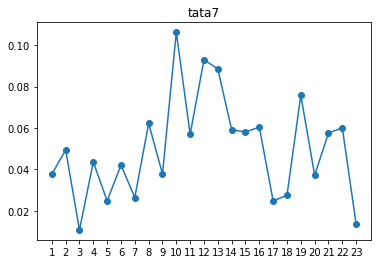

In [9]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_tata7)])
plt.plot(x[0:len(result_tata7)],result_tata7,marker='o')
plt.title("tata7")
plt.show()

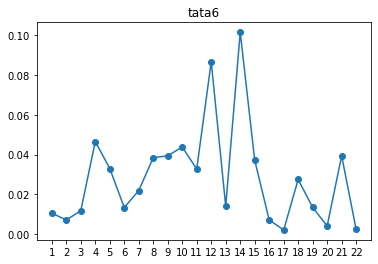

In [10]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_tata6)])
plt.plot(x[0:len(result_tata6)],result_tata6,marker='o')
plt.title("tata6")
plt.show()

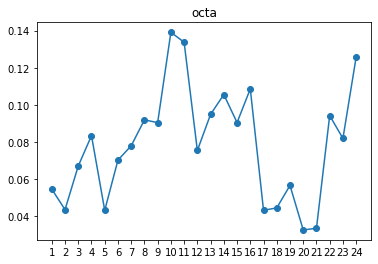

In [11]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_octa)])
plt.plot(x[0:len(result_octa)],result_octa,marker='o')
plt.title("octa")
plt.show()

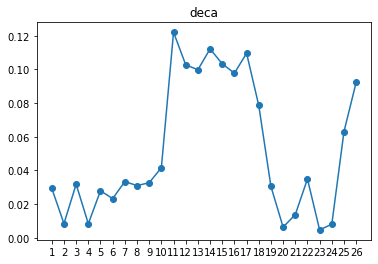

In [12]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_deca)])
plt.plot(x[0:len(result_deca)],result_deca,marker='o')
plt.title("deca")
plt.show()

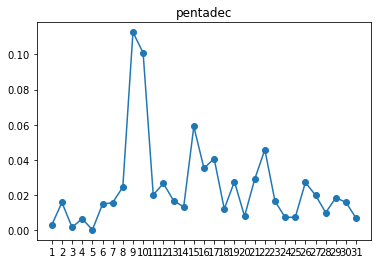

In [13]:
x = np.arange(1,35,1)
plt.xticks(ticks=x[0:len(result_penta)])
plt.plot(x[0:len(result_penta)],result_penta,marker='o')
plt.title("pentadec")
plt.show()